In [1]:
import riskSingleObserverPercept as model
import tools
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
theta0 = np.linspace(0, np.pi, 25, True)


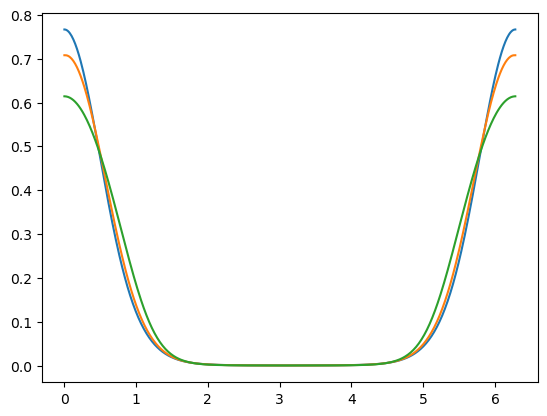

In [3]:
p_thetaest_given_theta0_p2 = model.bayesian_decoding_p(theta0, 1e4, 4,  p_exp=2.)
p_thetaest_given_theta0_p3 = model.bayesian_decoding_p(theta0, 1e4, 4,  p_exp=3.)
p_thetaest_given_theta0_p8 = model.bayesian_decoding_p(theta0, 1e4, 4,  p_exp=8.)

plt.plot(model.stim_ori_grid, p_thetaest_given_theta0_p2[0])
plt.plot(model.stim_ori_grid, p_thetaest_given_theta0_p3[0])
plt.plot(model.stim_ori_grid, p_thetaest_given_theta0_p8[0])

(-10.0, 10.0)

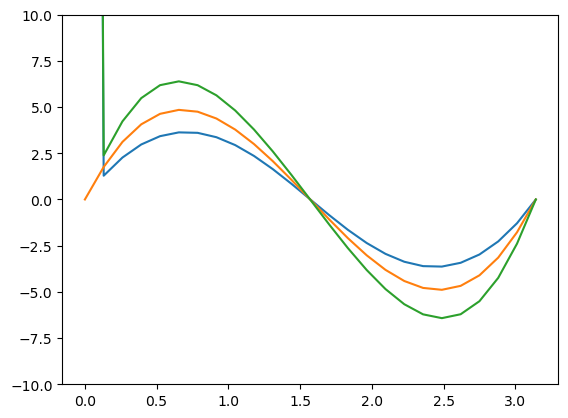

In [4]:
theta_est2 = model.expected_thetahat_theta0_p(theta0, 1e4, 6, p_exp=2.)
theta_est4 = model.expected_thetahat_theta0_p(theta0, 1e4, 6, p_exp=4.)
theta_est8 = model.expected_thetahat_theta0_p(theta0, 1e4, 6, p_exp=8.)

plt.plot(theta0, (theta_est2-theta0)*90/np.pi)
plt.plot(theta0, (theta_est4-theta0)*90/np.pi)
plt.plot(theta0, (theta_est8-theta0)*90/np.pi)

plt.ylim(-10., 10.)

In [ ]:
grad_val = np.abs(np.gradient(thetaest, model.rep_ori_grid))


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
# grad_val = abs(np.gradient(theta_estimates, rep_ori_grid)) #grad_value_ori(x_stim, type, line_frac)
    # ps = p_stim
    # # The last dimension of p which gives probability is stretched for new grid
    # ps[...,:] = ps[...,:]/grad_val

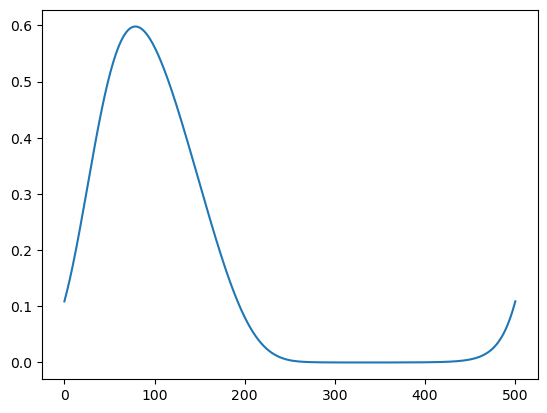

In [ ]:
plt.plot(thetaest.T)

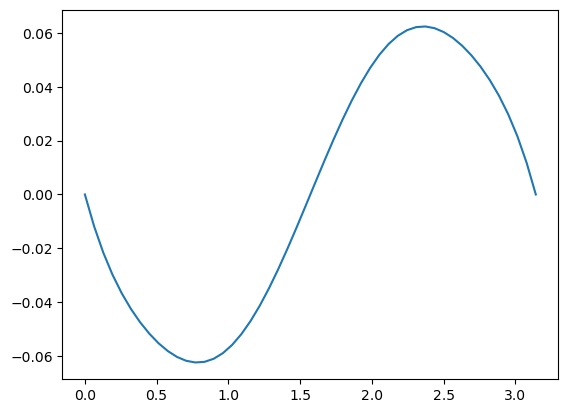

In [ ]:
theta_est = model.expected_thetahat_theta0(theta0, 1e4, 16)

plt.plot(theta0, theta0 - theta_est)

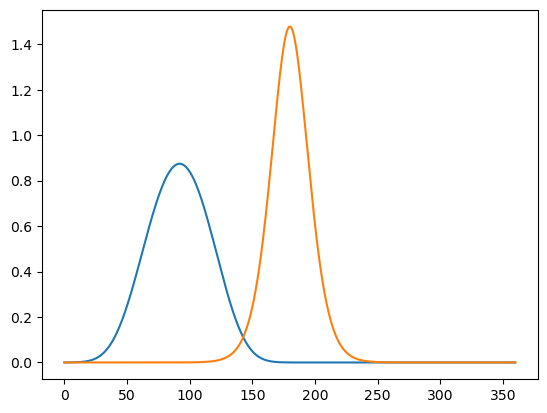

In [ ]:
plt.plot(model.stim_ori_grid*180/np.pi, p[25])
plt.plot(model.stim_ori_grid*180/np.pi, p[-1])

In [ ]:
import scipy.stats as ss

In [ ]:
dist = ss.vonmises(loc=[[2.2, 2.]], kappa=[[10., 10.]])

stim_ori_grid = model.stim_ori_grid

p_theta_given_m = dist.pdf(stim_ori_grid[:, np.newaxis])
p_exp = 2.


cost_function = lambda thetaest: np.sum(p_theta_given_m * (1 - np.cos(stim_ori_grid[:, np.newaxis] - thetaest[np.newaxis, :]))**(p_exp/2))
jacobian = lambda thetaest:  -np.diag(np.sum(p_theta_given_m * (.5 * p_exp * np.sin(stim_ori_grid[:, np.newaxis] - thetaest[np.newaxis, :]) * (1 - np.cos(stim_ori_grid[:, np.newaxis] - thetaest[np.newaxis, :]))**(p_exp/2 - 1)), 0))

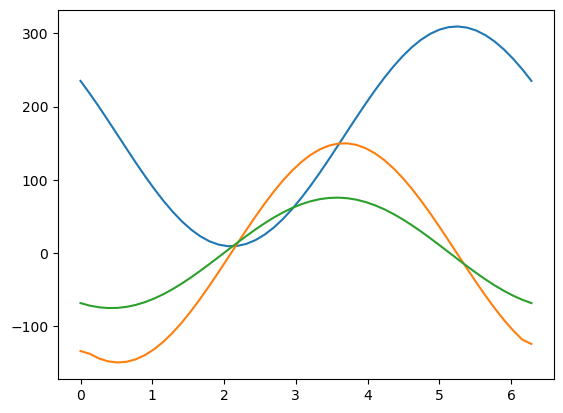

In [ ]:
x_ = np.linspace(0, 2*np.pi)
cost = [cost_function(np.array([e, e])) for e in x_]

est_jacobian = [jacobian(np.array([e, e]))[1, 1] for e in x_]

grad = np.gradient(cost, x_)

plt.plot(x_, cost)
plt.plot(x_, grad)
plt.plot(x_, est_jacobian)

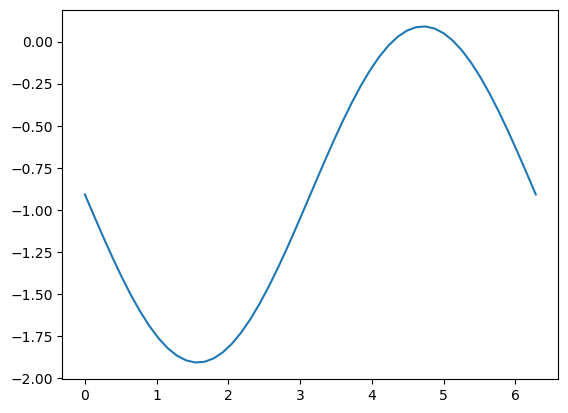

In [ ]:
plt.plot(x_, est_jacobian)

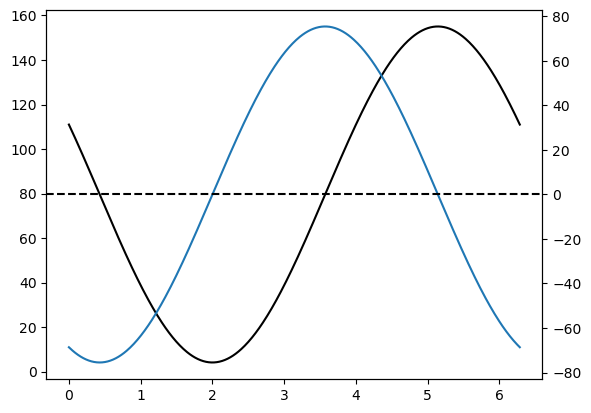

In [ ]:
dist = ss.vonmises(loc=2., kappa=10.)

stim_ori_grid = model.stim_ori_grid

p_theta_given_m = dist.pdf(stim_ori_grid)
p_exp = 2.

cost_function = lambda thetaest: np.sum(p_theta_given_m * (1 - np.cos(stim_ori_grid - thetaest))**(p_exp/2))
jacobian = lambda thetaest: -np.sum(p_theta_given_m * (.5 * p_exp * np.sin(stim_ori_grid - thetaest) * (1 - np.cos(stim_ori_grid - thetaest))**(p_exp/2 - 1)))

ax = plt.gca()
ax.plot(stim_ori_grid, [cost_function(e) for e in stim_ori_grid], c='k')

ax2 = ax.twinx()
ax2.plot(stim_ori_grid, [jacobian(e) for e in stim_ori_grid])
ax2.axhline(0.0, c='k', ls='--')
# # jacobian = lambda thetaest: np.diag(np.sum(.5 * p_exp * np.sin(stim_ori_grid[:, np.newaxis] - thetaest[np.newaxis, :]) * (1 - np.cos(stim_ori_grid[:, np.newaxis] - thetaest[np.newaxis, :]))**(p_exp/2 - 1), 0))